In [22]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from utils import *

import warnings
warnings.filterwarnings("ignore")

In [23]:
# data경로 확보
full_path  = os.getcwd()
upper_path = os.path.dirname(full_path)
data_path  = os.path.join(upper_path, 'data', '경진대회용 주조 공정최적화 데이터셋.csv')

In [24]:
data = pd.read_csv(data_path, encoding='cp949')

In [25]:
data = preprocess(data)

In [26]:
data_time_series = make_time_series(data, time_threshold=3000) # 3000초 => 50분

In [27]:
# see = []
# fail_count=[]
# for key, ts in data_time_series.items():
#     print()
#     print(f"Time series {key}:")
#     print(ts[['datetime']])# 각 time series 출력
#     fail_count.append(len(ts[ts['passorfail']==1]))
#     see.append(len(ts[['datetime']]))
#     print()

In [8]:
data_time_series = preprocess_time_series(data_time_series)

In [28]:
# see = []
# fail_count=[]
# for key, ts in data_time_series.items():
#     print()
#     print(f"Time series {key}:")
#     print(ts[['datetime']])# 각 time series 출력
#     fail_count.append(len(ts[ts['passorfail']==1]))
#     see.append(len(ts[['datetime']]))
#     print()

In [31]:
def plot_pass_fail_distribution(df, zoom_range=20):
    """
    전체 Pass/Fail 분포와 처음 몇 개의 데이터를 확대해서 보여주는 subplot을 그리는 함수.

    Parameters:
    - df: DataFrame, passorfail 컬럼이 포함된 데이터프레임
    - zoom_range: int, 확대할 데이터 범위 (default: 20)
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

    # seaborn 스타일로 설정
    sns.set(style="whitegrid")

    # 전체 데이터를 보여주는 그래프 (0은 파란색, 1은 빨간색으로 표시)
    colors = ['blue' if val == 0 else 'red' for val in df['passorfail']]
    ax1.scatter(df.index, df['passorfail'], color=colors, s=15)  # 점 크기 조정
    ax1.set_title('P/F Distribution of One Process', fontsize=14, fontweight='bold', pad=15)
    ax1.grid(True, linestyle='--', alpha=0.7)

    # y축 범위를 0.1에서 1.1로 조정 (간격을 줄이기 위해)
    ax1.set_ylim(-0.1, 1.1)
    ax1.set_yticks([0, 1])
    ax1.set_yticklabels(['Pass', 'Fail'], fontsize=12, fontweight='bold')

    # 특정 인덱스에 세로선 추가
    ax1.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Index 0')
    ax1.axvline(x=20, color='black', linestyle='--', linewidth=2, label='Index 20')

    # x축을 정수로만 표시 (전체 범위에서 자동 설정)
    ax1.set_xticks(range(0, len(df), 50))  # 50 단위로 x축에 정수 표시
    ax1.tick_params(axis='x', labelsize=10)

    # 앞부분 몇 개의 데이터를 강조한 줌인 그래프
    colors_zoom = ['blue' if val == 0 else 'red' for val in df['passorfail'][:zoom_range]]
    ax2.scatter(df.index[:zoom_range], df['passorfail'][:zoom_range], color=colors_zoom, s=30, edgecolor='black', linewidth=0.5)
    ax2.set_title(f'Zoomed-in View of First {zoom_range} Indices', fontsize=14, fontweight='bold', pad=15)
    ax2.grid(True, linestyle='--', alpha=0.7)

    # 세로선 추가
    ax2.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Index 0')
    ax2.axvline(x=zoom_range, color='black', linestyle='--', linewidth=2, label=f'Index {zoom_range}')

    # y축 범위를 0.1에서 1.1로 조정
    ax2.set_ylim(-0.1, 1.1)
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels(['Pass', 'Fail'], fontsize=12, fontweight='bold')

    # x축을 정수로만 표시 (zoom_range 범위 내)
    ax2.set_xticks(range(0, zoom_range + 1, 5))  # 5 단위로 x축에 정수 표시
    ax2.tick_params(axis='x', labelsize=10)

    # 축 레이블 설정
    ax1.set_ylabel('Pass or Fail', fontsize=12)
    ax2.set_ylabel('Pass or Fail', fontsize=12)
    ax2.set_xlabel('Unit', fontsize=12)

    # 간격을 줄이기 위해 tight_layout 조정
    plt.tight_layout(pad=1.5)

    plt.show()

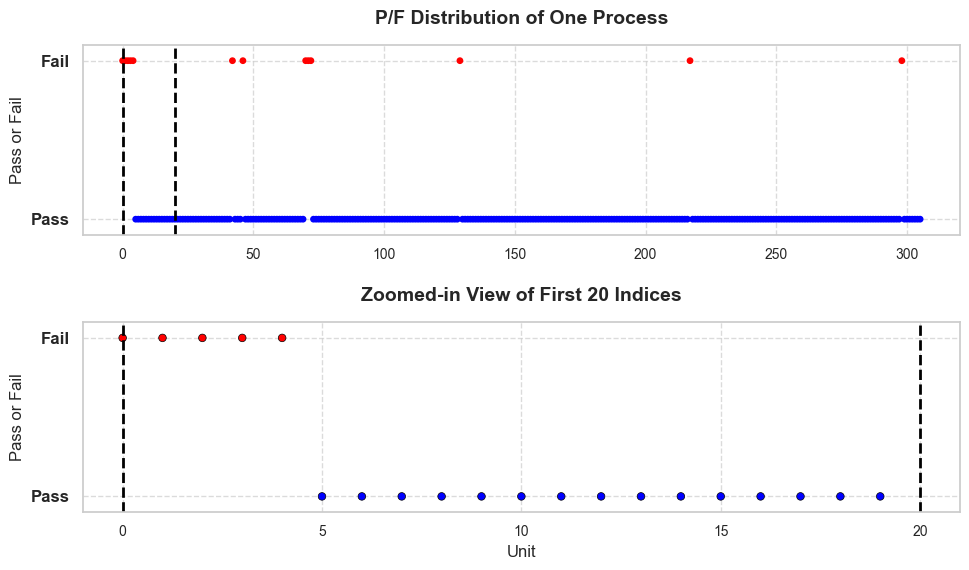

In [32]:
plot_pass_fail_distribution(data_time_series[13], 20)

In [19]:
df = make_dataframe(data_time_series)

In [20]:
# train valid test split
X_train, X_valid, X_test, y_train, y_valid, y_test = split(df, valid_size=0.2, test_size=0.2, random_state=42)

# remove outlier
X_train, y_train = remove_outlier(X_train, y_train)

# imputation
X_train, X_valid, X_test = imputation(X_train, X_valid, X_test)

In [22]:
data['time_diff'].mean()

0.2834568652596344

In [21]:
data[data['time_diff'] > 600]

,Unnamed: 0,line,name,mold_name,date,time,count,working,emergency_stop,molten_temp,...,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace,time_diff
97,97,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,1900-01-01 19:52:48,1,가동,ON,713.0,...,487.0,0.0,22.0,25,2019-01-02 19:52,0.0,NaN,8412,B,3339.0
656,656,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-03,1900-01-01 08:00:05,1,가동,ON,730.0,...,474.0,699.0,25.0,23,2019-01-03 8:00,1.0,NaN,8573,A,2161.0
845,845,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-03,1900-01-01 14:57:07,190,가동,ON,733.0,...,469.0,714.0,28.0,23,2019-01-03 14:57,1.0,NaN,8573,B,1006.0
959,959,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-03,1900-01-01 20:00:21,1,가동,ON,729.0,...,467.0,713.0,25.0,23,2019-01-03 20:00,1.0,NaN,8573,A,3661.0
1110,1110,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-04,1900-01-01 01:32:16,152,가동,ON,730.0,...,485.0,700.0,31.0,23,2019-01-04 1:32,1.0,NaN,8573,A,1120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91528,91528,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-29,1900-01-01 15:16:44,184,가동,ON,731.0,...,170.0,731.0,32.0,0,2019-03-29 15:16,1.0,D,8917,B,1266.0
91632,91632,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-29,1900-01-01 20:00:04,1,가동,ON,731.0,...,133.0,724.0,27.0,0,2019-03-29 20:00,1.0,D,8917,A,3566.0
91940,91940,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,1900-01-01 20:08:22,1,가동,ON,729.0,...,108.0,1.0,18.0,0,2019-03-31 20:08,1.0,D,8917,A,48012.0
91953,91953,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-03-31,1900-01-01 20:53:29,14,가동,ON,731.0,...,219.0,710.0,27.0,0,2019-03-31 20:53,1.0,D,8917,A,624.0


In [9]:
data.head()

,Unnamed: 0,line,name,mold_name,date,time,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45,0.0,NaN,8722,NaN
1,1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45,0.0,NaN,8412,B
2,2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45,0.0,NaN,8412,B
3,3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48,0.0,NaN,8412,B
4,4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50,0.0,NaN,8412,B


In [7]:
data['time']

0        16:45:06
1        16:45:08
2        16:45:58
3        16:48:03
4        16:50:08
           ...   
92010    23:51:29
92011    23:53:28
92012    23:55:44
92013    23:57:46
92014    23:59:48
Name: time, Length: 92015, dtype: object

In [8]:
data['date']

0        2019-01-02
1        2019-01-02
2        2019-01-02
3        2019-01-02
4        2019-01-02
            ...    
92010    2019-03-31
92011    2019-03-31
92012    2019-03-31
92013    2019-03-31
92014    2019-03-31
Name: date, Length: 92015, dtype: object

In [4]:
data.columns

Index(['Unnamed: 0', 'line', 'name', 'mold_name', 'time', 'date', 'count',
       'working', 'emergency_stop', 'molten_temp',
       'facility_operation_cycleTime', 'production_cycletime',
       'low_section_speed', 'high_section_speed', 'molten_volume',
       'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1',
       'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1',
       'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature',
       'physical_strength', 'Coolant_temperature', 'EMS_operation_time',
       'registration_time', 'passorfail', 'tryshot_signal', 'mold_code',
       'heating_furnace'],
      dtype='object')

In [63]:
feature = 'lower_mold_temp2'

In [64]:
data[feature].isnull().sum()

1

In [65]:
data[feature].head(10)

0    316.0
1    163.0
2    163.0
3    179.0
4    187.0
5    195.0
6    197.0
7    199.0
8    189.0
9    199.0
Name: lower_mold_temp2, dtype: float64

In [66]:
data[feature].value_counts()

lower_mold_temp2
180.0    1499
181.0    1441
182.0    1338
179.0    1276
146.0    1152
         ... 
473.0       1
467.0       1
461.0       1
456.0       1
316.0       1
Name: count, Length: 323, dtype: int64

In [67]:
data[feature].describe()

count    92014.000000
mean       200.021725
std         45.216804
min         20.000000
25%        172.000000
50%        198.000000
75%        229.000000
max       1449.000000
Name: lower_mold_temp2, dtype: float64

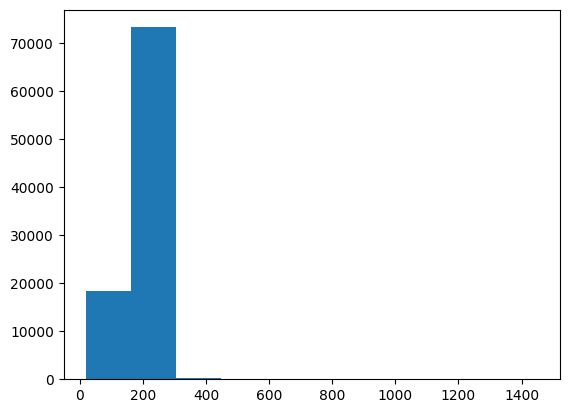

In [68]:
plt.hist(data[feature])
plt.show()

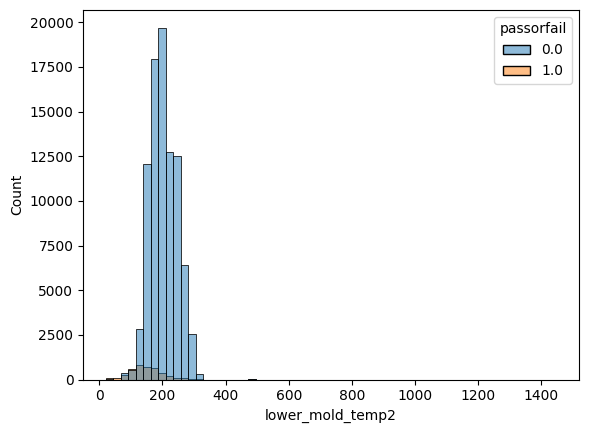

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히스토그램 그릴 때 빈의 개수와 범위를 조정
sns.histplot(data=data, x=feature, hue="passorfail", multiple="layer", alpha=0.5, bins=60)


plt.show()

In [72]:
# threshold 값 설정
threshold = 800  # 원하는 범위를 설정

# threshold보다 작은 값 필터링
filtered_data = data[data[feature] > threshold]

# passorfail 값에 따른 개수 세기
passorfail_count = filtered_data['passorfail'].value_counts()

print(passorfail_count)

passorfail
1.0    4
Name: count, dtype: int64


In [73]:
# threshold보다 작은 값 필터링
filtered_data = data[data[feature] == 'B']

# passorfail 값에 따른 개수 세기
passorfail_count = filtered_data['passorfail'].value_counts()
passorfail_count

Series([], Name: count, dtype: int64)

### molten_temp

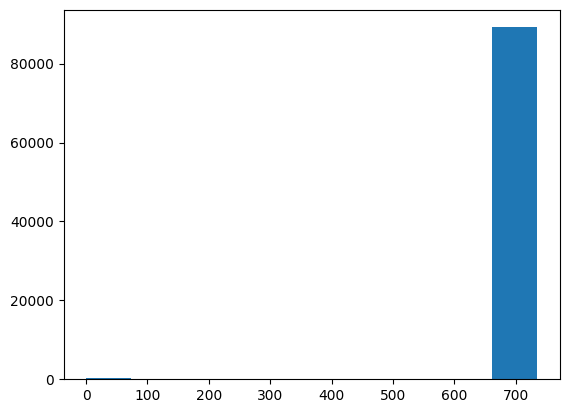

In [48]:
plt.hist(data['molten_temp'])
plt.show()

<Axes: >

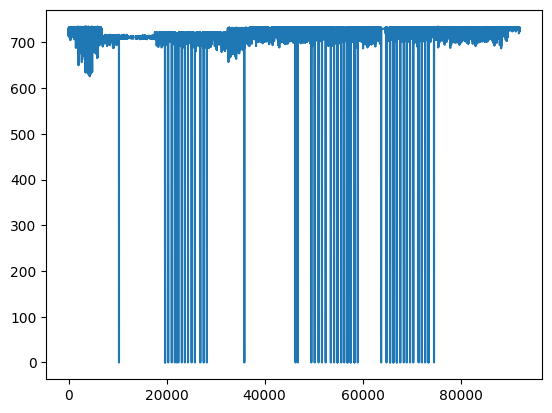

In [45]:
data['molten_temp'].plot()

In [41]:
data.time.value_counts()

time
5:28:32     8
3:10:12     8
23:15:00    7
16:36:26    7
12:56:41    7
           ..
1:00:51     1
0:59:50     1
0:53:52     1
0:51:51     1
23:51:29    1
Name: count, Length: 54640, dtype: int64

In [39]:
data.head()

,Unnamed: 0,line,name,mold_name,date,time,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45,0.0,NaN,8722,NaN
1,1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45,0.0,NaN,8412,B
2,2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45,0.0,NaN,8412,B
3,3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48,0.0,NaN,8412,B
4,4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50,0.0,NaN,8412,B


In [34]:
data.rename(columns={'date': 'time', 'time': 'date'}, inplace=True)

In [35]:
data.columns

Index(['Unnamed: 0', 'line', 'name', 'mold_name', 'date', 'time', 'count',
       'working', 'emergency_stop', 'molten_temp',
       'facility_operation_cycleTime', 'production_cycletime',
       'low_section_speed', 'high_section_speed', 'molten_volume',
       'cast_pressure', 'biscuit_thickness', 'upper_mold_temp1',
       'upper_mold_temp2', 'upper_mold_temp3', 'lower_mold_temp1',
       'lower_mold_temp2', 'lower_mold_temp3', 'sleeve_temperature',
       'physical_strength', 'Coolant_temperature', 'EMS_operation_time',
       'registration_time', 'passorfail', 'tryshot_signal', 'mold_code',
       'heating_furnace'],
      dtype='object')

In [36]:
data.time.value_counts()

time
5:28:32     8
3:10:12     8
23:15:00    7
16:36:26    7
12:56:41    7
           ..
1:00:51     1
0:59:50     1
0:53:52     1
0:51:51     1
23:51:29    1
Name: count, Length: 54640, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    92015 non-null  int64  
 1   line                          92015 non-null  object 
 2   name                          92015 non-null  object 
 3   mold_name                     92015 non-null  object 
 4   time                          92015 non-null  object 
 5   date                          92015 non-null  object 
 6   count                         92015 non-null  int64  
 7   working                       92014 non-null  object 
 8   emergency_stop                92014 non-null  object 
 9   molten_temp                   89754 non-null  float64
 10  facility_operation_cycleTime  92015 non-null  int64  
 11  production_cycletime          92015 non-null  int64  
 12  low_section_speed             92014 non-null  float64
 13  h

In [10]:
data.describe()

,Unnamed: 0,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
count,92015.000000,92015.000000,89754.000000,92015.000000,92015.000000,92014.000000,92014.000000,46885.000000,92014.000000,92014.000000,...,91702.000000,92014.000000,92014.000000,91702.000000,92014.000000,92014.000000,92014.000000,92015.000000,92014.000000,92015.000000
mean,46007.000000,148.510895,718.618513,121.555007,122.514525,110.794999,112.624959,154.976624,324.554535,50.666486,...,1320.032278,203.766155,200.021725,1441.953033,418.613255,701.262493,32.332938,18.417595,0.043646,8674.612313
std,26562.586847,87.969953,51.728659,12.116145,13.595314,305.181962,10.759272,485.640901,27.327683,17.925620,...,392.371589,53.437545,45.216804,219.178967,115.831898,373.634822,14.265024,8.356021,0.204306,205.609122
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,...,42.000000,18.000000,20.000000,299.000000,23.000000,0.000000,16.000000,0.000000,0.000000,8412.000000
25%,23003.500000,72.000000,713.000000,117.000000,119.000000,110.000000,112.000000,49.000000,329.000000,47.000000,...,1449.000000,165.000000,172.000000,1449.000000,383.000000,697.000000,31.000000,23.000000,0.000000,8413.000000
50%,46007.000000,146.000000,728.000000,119.000000,121.000000,110.000000,112.000000,67.000000,330.000000,50.000000,...,1449.000000,208.000000,198.000000,1449.000000,461.000000,703.000000,32.000000,23.000000,0.000000,8722.000000
75%,69010.500000,222.000000,730.000000,122.000000,123.000000,110.000000,112.000000,85.000000,331.000000,53.000000,...,1449.000000,250.000000,229.000000,1449.000000,484.000000,710.000000,34.000000,23.000000,0.000000,8917.000000
max,92014.000000,334.000000,735.000000,457.000000,485.000000,65535.000000,388.000000,2767.000000,348.000000,422.000000,...,1449.000000,369.000000,1449.000000,65503.000000,1449.000000,65535.000000,1449.000000,25.000000,1.000000,8917.000000


In [11]:
data.isnull().sum()

Unnamed: 0                          0
line                                0
name                                0
mold_name                           0
time                                0
date                                0
count                               0
working                             1
emergency_stop                      1
molten_temp                      2261
facility_operation_cycleTime        0
production_cycletime                0
low_section_speed                   1
high_section_speed                  1
molten_volume                   45130
cast_pressure                       1
biscuit_thickness                   1
upper_mold_temp1                    1
upper_mold_temp2                    1
upper_mold_temp3                  313
lower_mold_temp1                    1
lower_mold_temp2                    1
lower_mold_temp3                  313
sleeve_temperature                  1
physical_strength                   1
Coolant_temperature                 1
EMS_operatio

In [12]:
data.head()

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45,0.0,NaN,8722,NaN
1,1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45,0.0,NaN,8412,B
2,2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45,0.0,NaN,8412,B
3,3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48,0.0,NaN,8412,B
4,4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50,0.0,NaN,8412,B
